In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install -q pyomo
from pyomo.environ import *

# installing qpsolvers from web
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp
!pip install -i https://pypi.gurobi.com gurobipy
import gurobipy as gp
# Install solver as well into collab session
!apt-get install -y -qq glpk-utils
!apt-get install -y -qq coinor-cbc


Looking in indexes: https://pypi.gurobi.com


QUESTION 2 Part 4 Solving using qpsolver

In [ ]:
P = np.array([[12983, 0, 0, 0],
              [0, 2400, 0, 0],
              [0, 0, 440, -52.42],
              [0, 0, -52.42, 68.7]])

q = np.array([-6748000 ,-1184000 ,-420000 ,-70000])

G =  np.array([[-259.66 , -1045.5875 , 6.655 , 9.016],
             [-584.235 , -103.74 , 10.66 , 7.728],
             [6491.5 , 0 , 0 , 0],
             [0 , 1200 , 0 , 0],
             [0 , 220 , 0 , -25.76],
              [0 , 34.35 , -26.66 , 0]])
h = np.array([-781620  ,-35000 ,6748000 ,1184000 ,420000 ,70000])

A = np.array([482, 32, 21, 7])
b = np.array([193949])
lower = np.array([0,0,0,0])
x = solve_qp(P, q, G = G, h = h, A = A, b =b, lb=lower, ub=None, solver = "osqp")

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


In [ ]:
x


array([310.22403488, 683.28825773, 768.95721188, 915.38421284])

In [ ]:
-0.5*x@P@x - q@x

1982479644.2045825

part 5

In [ ]:
lst = np.linspace(-0.1,0.05,50)
results = []
for pi in lst:
  P = np.array([[12983, 0, 0, 0],
              [0, 2400, 0, 0],
              [0, 0, 440, -52.42],
              [0, 0, -52.42, 68.7]])

  q = np.array([-6748000 ,-1184000 ,-420000 ,-70000])

  G =  np.array([[-259.66 , -1045.5875 , 6.655 , 9.016],
              [-584.235 , -103.74 , 10.66 , 7.728],
              [6491.5 , 0 , 0 , 0],
              [0 , 1200 , 0 , 0],
              [0 , 220 , 0 , -25.76],
                [0 , 34.35 , -26.66 , 0]])
  h = np.array([-781620  ,-35000 ,6748000 ,1184000 ,420000 ,70000])

  A = np.array([482, 32, 21, 7])
  k = 193949*(1+pi)
  b = np.array([k])
  lower = np.array([0,0,0,0])
  x = solve_qp(P, q, G = G, h = h, A = A, b =b, lb=lower, ub=None, solver = "osqp")
  revenue = -0.5*x@P@x - q@x
  results.append(revenue/1000000)

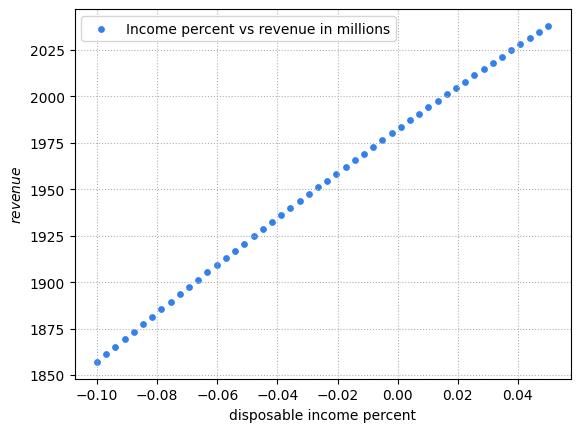

In [ ]:
plt.scatter(lst, results,color = "#3480eb", s =15)
plt.xlabel("disposable income percent")
plt.ylabel("$revenue$")
plt.grid(linestyle = ":")
plt.legend(labels = [r"Income percent vs revenue in millions"])